In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
#import data
data= pd.read_csv('https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Loan_Prediction/train.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
#remove unneccassary columns
data_filtered = data.drop('Loan_ID', axis=1)
data_filtered

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [19]:
data_filtered.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [22]:
data_filtered.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [37]:
cat_cols =  data_filtered.dtypes=='object'
cat_cols= list(cat_cols[cat_cols].index)
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

Plot categorical data

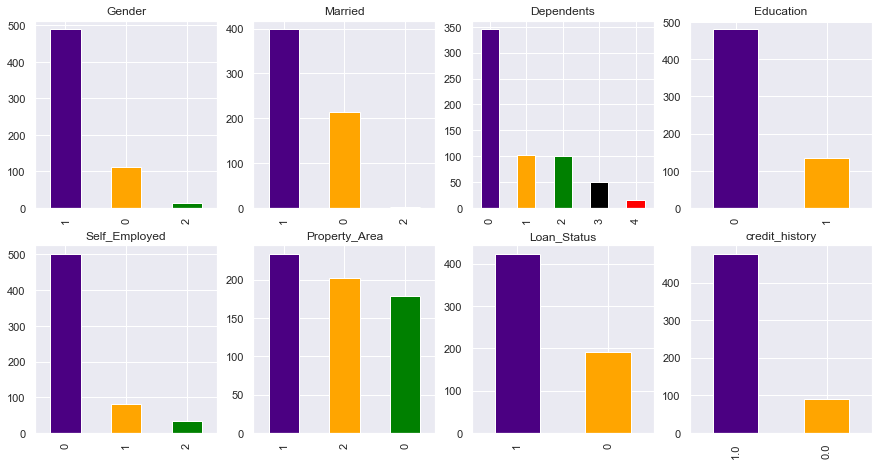

In [81]:
plt.figure(figsize=(15,20))

index=1;
for col in cat_cols:
    plt.subplot(5,4,index)
    data_filtered[col].value_counts().plot.bar(title=col, color=[  'indigo','orange', 'green','black', 'red'])
    index=index+1
    
plt.subplot(5,4,8)
data_filtered['Credit_History'].value_counts().plot.bar(title='credit_history', color=[  'indigo','orange', 'green','black', 'red'])
print()

# Inferences
Most people whose loan is approved/ people applying for loan are males, most have 0 dependents, most are married,are graduates, 15% are self-employed and around 50% repay their loans.


In [70]:
# lets convert categorical variables into dummy variables

In [75]:
# Import label encoder
from sklearn import preprocessing
    
# label_encoder object knows how 
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()

for col in cat_cols:
  data_filtered[col] = label_encoder.fit_transform(data[col])

data_filtered.dtypes
data_filtered.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Plot Numerical data

In [87]:
num_data =  data.dtypes!='object'
num_data = list(num_data[num_data].index)
num_data = num_data[:4]
num_data

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

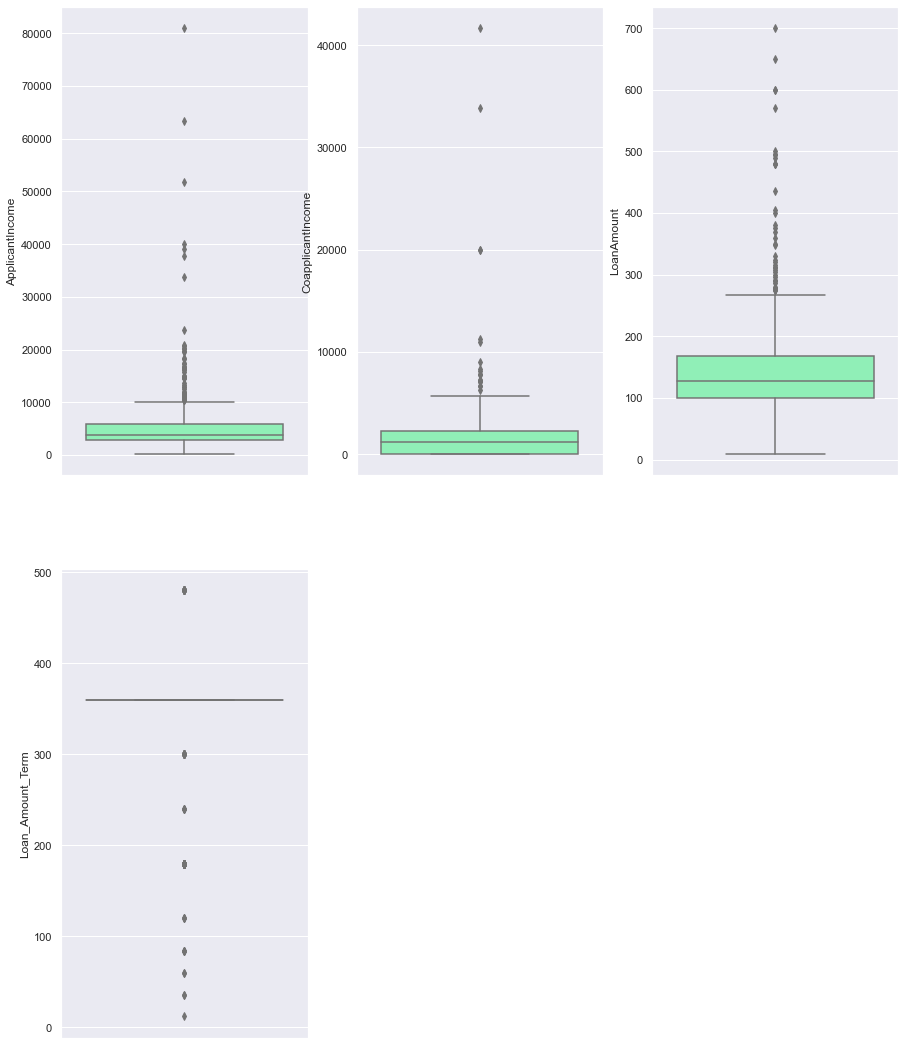

In [104]:
plt.figure(figsize=(15,50))

index=1;
for col in num_data:
    plt.subplot(5,3,index)
    sns.boxplot(y=data_filtered[col],orient='v',palette='rainbow')
    index=index+1
    

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

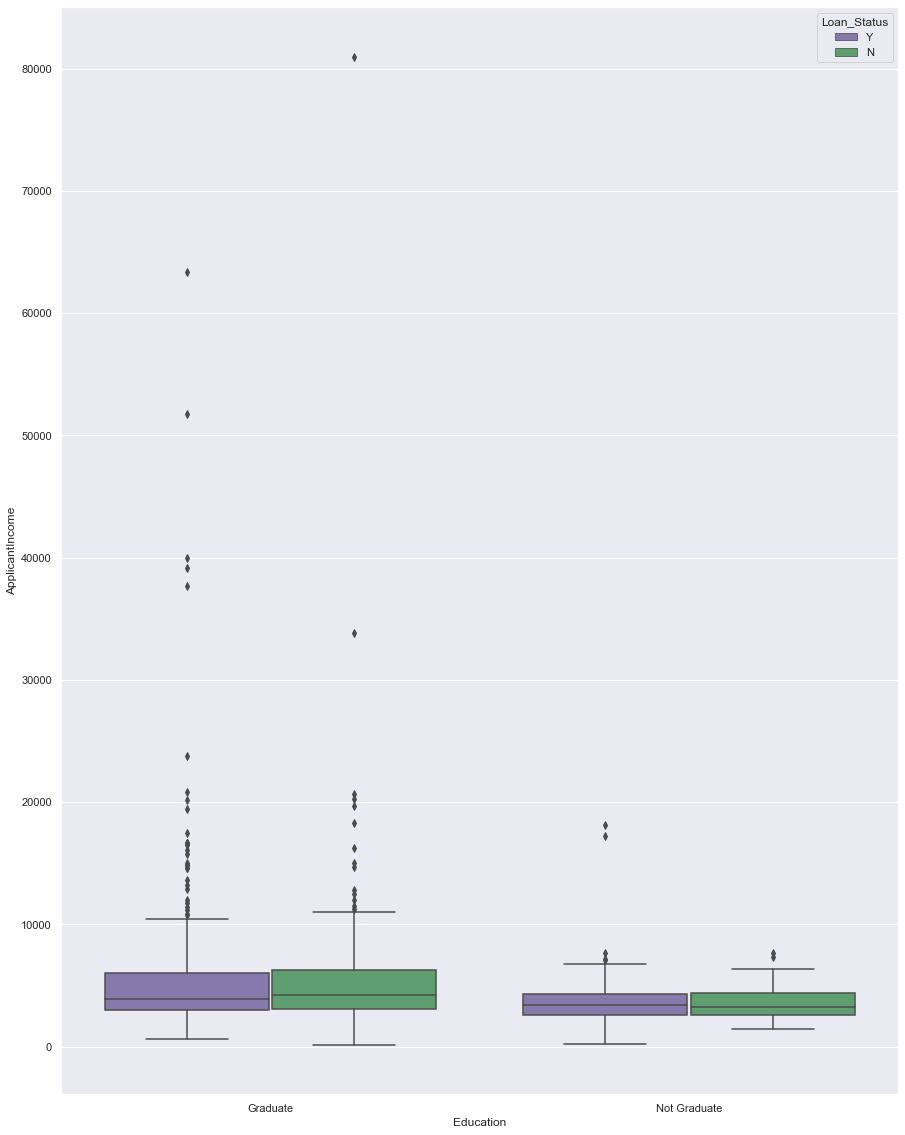

In [140]:
plt.figure(figsize=(15,20))
sns.boxplot( y="ApplicantIncome",x='Education',
            hue="Loan_Status", palette=["m", "g"],
            data=data)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

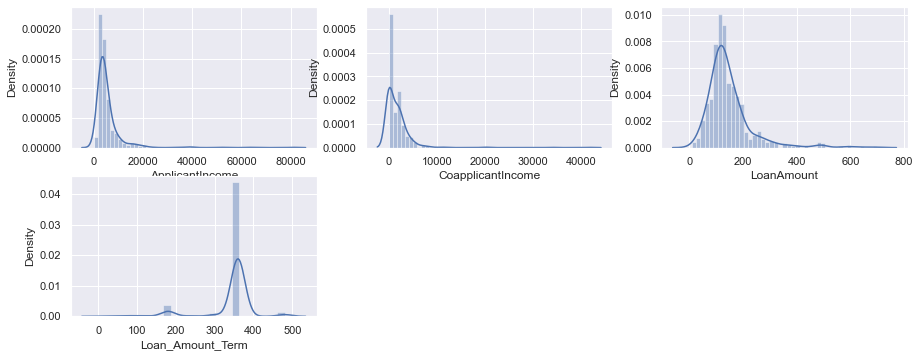

In [142]:
plt.figure(figsize=(15,15))

index=1;
for col in num_data:
    plt.subplot(5,3,index)
    sns.distplot(data_filtered[col])
    index=index+1


<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

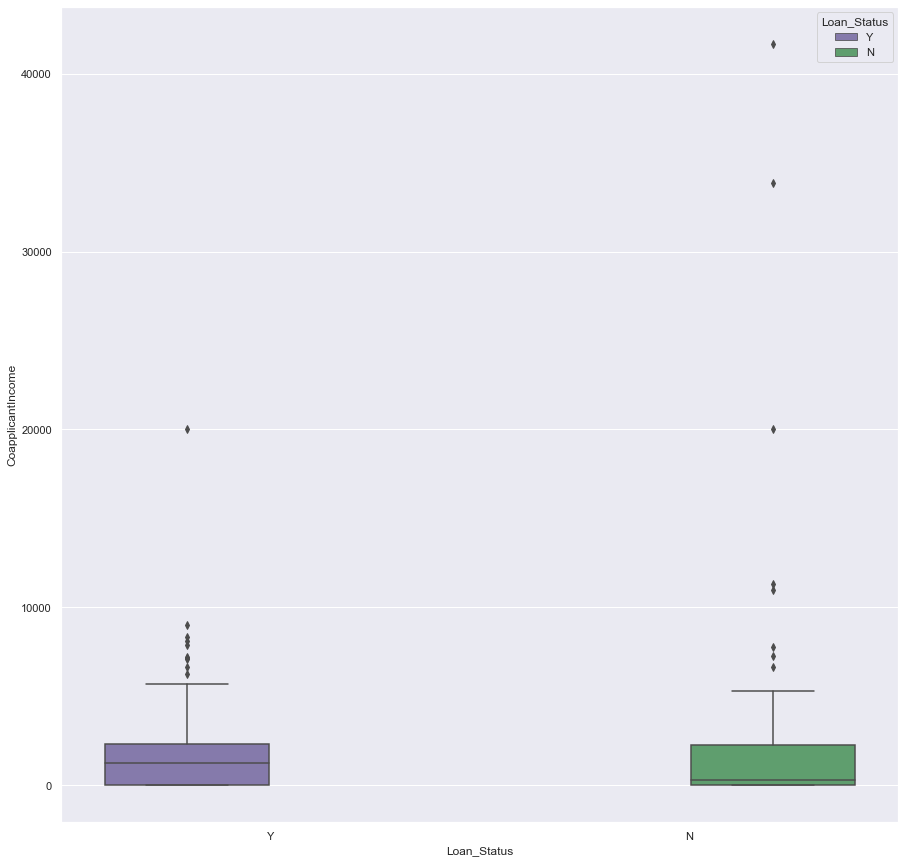

In [133]:
plt.figure(figsize=(15,15))
sns.boxplot( y="CoapplicantIncome",x='Loan_Status',
            hue="Loan_Status", palette=["m", "g"],
            data=data)

<AxesSubplot:>

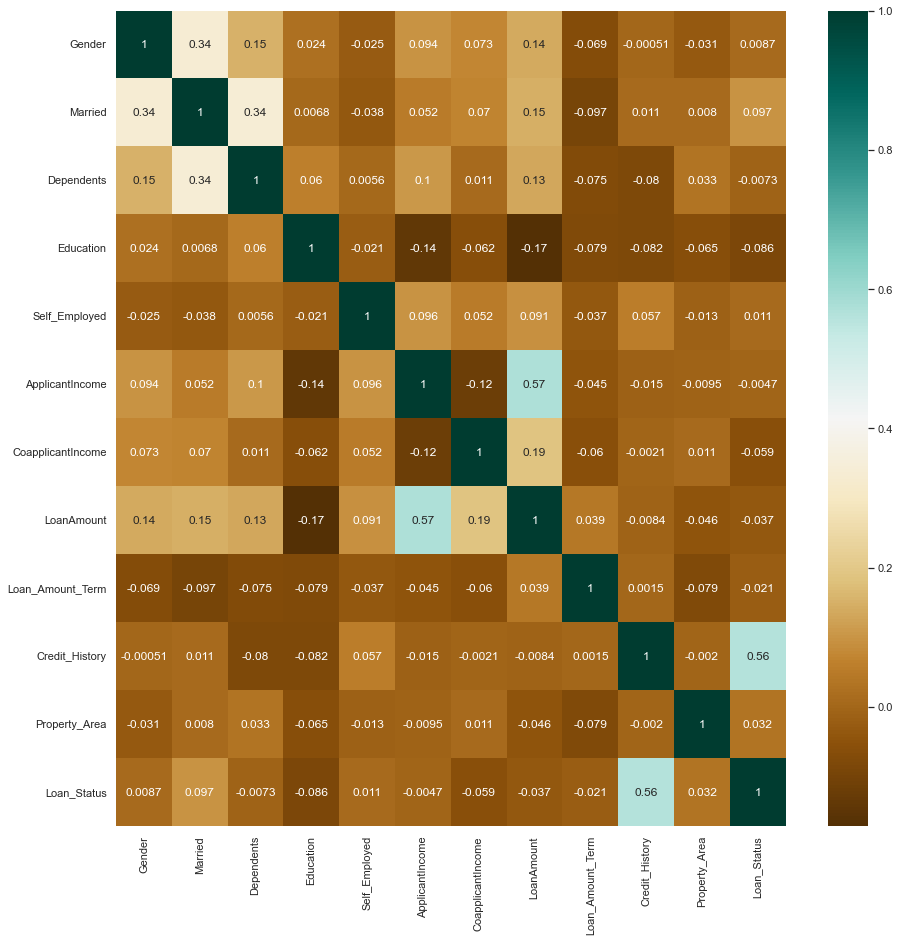

In [139]:
#Bivariate Analysis
plt.figure(figsize=(15,15))
sns.heatmap(data_filtered.corr(),annot=True,cmap='BrBG')


#All plots are fairly normally distributed
#Loan is given to people with high credit score and loan amount is negatively correklated to 
#loan_status indicating higher the amount less is the chnace of getting a loan


In [144]:
#handle mising values
data_filtered.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [146]:
for col in data_filtered.columns:
    data_filtered[col]=data_filtered[col].fillna(data_filtered[col].mean())
    
data_filtered.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [155]:
#split dataset
from sklearn.model_selection import train_test_split
y= data_filtered['Loan_Status']
x= data_filtered.drop('Loan_Status',axis=1)
x.columns
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

#Since this is a classification problem we will use the following models
-- Logistic regression
-- Decision Tree
-- KNN
-- RandomForest

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

logit_clf = LogisticRegression()
Decision_clf = DecisionTreeClassifier(splitter='best')
KNN_clf = KNeighborsClassifier(3)
Random_forest_clf= RandomForestClassifier(n_estimators=500,random_state=1)

In [225]:
#fit the models
logit_clf.fit(x_train,y_train)
y_pred=logit_clf.predict(x_test)

#confusion matrix for logistic regresssion
from sklearn.metrics import confusion_matrix,accuracy_score
print('accuracy_score- '+ str(accuracy_score(y_test,y_pred)))

confusion_matrix(y_test,y_pred)

accuracy_score- 0.7967479674796748


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[16, 23],
       [ 2, 82]], dtype=int64)

This Model is more Biased towards 'NO'

In [180]:
Decision_clf.fit(x_train,y_train)
y_pred=Decision_clf.predict(x_test)

#confusion matrix for Decision Tree

print('accuracy_score- '+ str(accuracy_score(y_test,y_pred)))
print(confusion_matrix(y_test,y_pred))

#try to improve the model
Decision_clf = DecisionTreeClassifier(splitter='best',criterion='gini')

Decision_clf.fit(x_train,y_train)
y_pred=Decision_clf.predict(x_test)

#confusion matrix for Decision Tree

print('accuracy_score - gini - '+ str(accuracy_score(y_test,y_pred)))
confusion_matrix(y_test,y_pred)



accuracy_score- 0.6910569105691057
[[20 19]
 [19 65]]
accuracy_score - gini - 0.7073170731707317


array([[21, 18],
       [18, 66]], dtype=int64)

In [186]:

KNN_clf.fit(x_train,y_train)
y_pred=KNN_clf.predict(x_test)

#confusion matrix for KNN

print('accuracy_score - KNN - '+ str(accuracy_score(y_test,y_pred)))
confusion_matrix(y_test,y_pred)


accuracy_score - KNN - 0.5934959349593496


array([[ 8, 31],
       [19, 65]], dtype=int64)

In [195]:
Random_forest_clf.fit(x_train,y_train)
y_pred=Random_forest_clf.predict(x_test)

#confusion matrix for KNN

print('accuracy_score - RandomForest - '+ str(accuracy_score(y_test,y_pred)))
confusion_matrix(y_test,y_pred)


accuracy_score - RandomForest - 0.7642276422764228


array([[16, 23],
       [ 6, 78]], dtype=int64)

In [210]:
#feature selection
importance=Random_forest_clf.feature_importances_
importance.sort()
importance

array([0.02294224, 0.0241071 , 0.02485317, 0.02640327, 0.04552354,
       0.04798704, 0.04877381, 0.10929451, 0.17778495, 0.1881217 ,
       0.28420866])

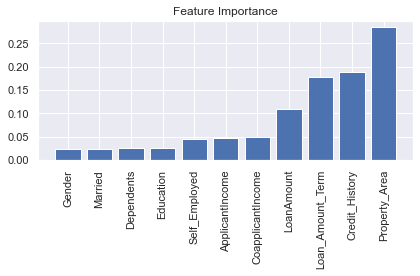

In [212]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importance, align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns, rotation=90)
plt.tight_layout()
plt.show()

In [229]:
#remove the less important featiures
x_train_filter = x_train.drop(columns=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome'])
y_train_filter = y_train.drop(columns=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome'])
x_test_filter = x_test.drop(columns=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome'])
y_test_filter = y_test.drop(columns=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome'])



Random_forest_clf= RandomForestClassifier(n_estimators=500,random_state=1,criterion='entropy')
Random_forest_clf.fit(x_train_filter,y_train_filter)
y_pred=Random_forest_clf.predict(x_test_filter)

#confusion matrix for KNN

print('accuracy_score - RandomForest - '+ str(accuracy_score(y_test,y_pred)))
confusion_matrix(y_test,y_pred)


accuracy_score - RandomForest - 0.7642276422764228


array([[23, 16],
       [13, 71]], dtype=int64)

In [234]:
# try boosting method

!pip install xgboost

from xgboost import XGBClassifier

In [237]:
xg_clf = XGBClassifier()
xg_clf.fit(x_train,y_train)
y_pred = xg_clf.predict(x_test)

print('accuracy_score - xgboost - '+ str(accuracy_score(y_test,y_pred)))
confusion_matrix(y_test,y_pred)


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:05:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score - xgboost - 0.7804878048780488


array([[21, 18],
       [ 9, 75]], dtype=int64)

In [240]:
x_train_filter = x_train.drop(columns=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome'])

x_test_filter = x_test.drop(columns=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome'])


#scaling



xg_clf = XGBClassifier()
xg_clf.fit(x_train_filter,y_train)
y_pred = xg_clf.predict(X_test)

print('accuracy_score - xgboost - '+ str(accuracy_score(y_test,y_pred)))
confusion_matrix(y_test,y_pred)

C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:08:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score - xgboost - 0.7886178861788617


array([[18, 21],
       [ 5, 79]], dtype=int64)

The max accuracy- 78%